Lignes avec des valeurs non numériques dans 'Prix ' :
Empty DataFrame
Columns: [Prix , Superficie]
Index: []
Step 0: Cost = 0.9885527202302384
Step 100: Cost = 0.5002966012888987
Step 200: Cost = 0.4348802052257291
Step 300: Cost = 0.426115737750804
Step 400: Cost = 0.4249414772482118
Step 500: Cost = 0.42478415020787735
Step 600: Cost = 0.4247630715821657
Step 700: Cost = 0.42476024747474633
Step 800: Cost = 0.4247598691017535
Step 900: Cost = 0.4247598184074608
Step 1000: Cost = 0.42475981161545834
Step 1100: Cost = 0.4247598107054668
Step 1200: Cost = 0.42475981058354717
Step 1300: Cost = 0.42475981056721196
Step 1400: Cost = 0.42475981056502343
Step 1500: Cost = 0.42475981056473133
Step 1600: Cost = 0.4247598105646911
Step 1700: Cost = 0.424759810564686
Step 1800: Cost = 0.42475981056468465
Step 1900: Cost = 0.4247598105646827
Step 2000: Cost = 0.4247598105646841
Step 2100: Cost = 0.4247598105646836
Step 2200: Cost = 0.4247598105646859
Step 2300: Cost = 0.4247598105646856
Step 2400

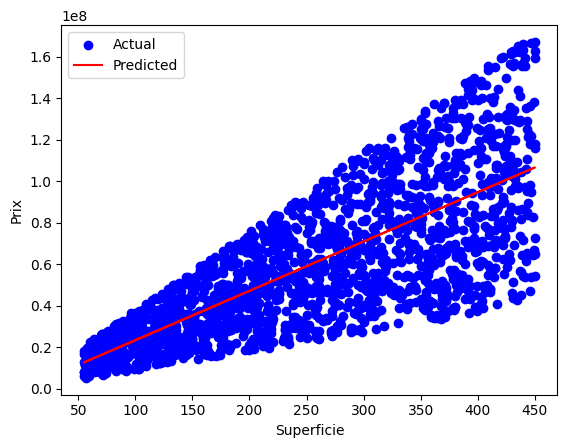

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import openpyxl
import joblib
from model.SimpleLinearRegression import SimpleLinearRegression

# Charger les données
df = pd.read_excel('/Users/chawkibhd/Desktop/propremodel/backend/data/DataSets_01.xlsx')

# Convertir les colonnes 'Superficie' et 'Prix ' en numériques, en remplaçant les erreurs par NaN
df['Superficie'] = pd.to_numeric(df['Superficie'], errors='coerce')
df['Prix '] = pd.to_numeric(df['Prix '], errors='coerce')

# Supprimer les lignes contenant des NaN dans 'Superficie' ou 'Prix '
df.dropna(subset=['Superficie', 'Prix '], inplace=True)

# Identifier les lignes où 'Prix ' contient des valeurs non numériques
non_numeric_rows = df[df['Prix '].isna()]

# Afficher les lignes avec des valeurs non numériques dans 'Prix '
print("Lignes avec des valeurs non numériques dans 'Prix ' :")
print(non_numeric_rows)

# Extraire les variables d'entrée et de sortie
X = df[['Superficie']].values
y = df['Prix '].values


# Diviser les données en ensembles d'entraînement et de test (70% entraînement, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialiser et entraîner le modèle en utilisant la descente de gradient
model = SimpleLinearRegression()
model.fit(X_train, y_train, max_steps=10000, learning_rate=0.01)

# Afficher les paramètres du modèle
print(f"Using Gradient Descent:")
print(f"Slope (b1): {model.slope}")
print(f"Intercept (b0): {model.intercept}")

# Évaluer le modèle
r2_score = model.score(X_test, y_test)
print(f"R-squared: {r2_score}")

# Optionnel: Visualisation des résultats
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, model.predict(X_test), color='red', label='Predicted')
plt.xlabel('Superficie')
plt.ylabel('Prix')
plt.legend()
plt.show()

In [28]:
# Sauvegarder le modèle entraîné
joblib.dump(model, 'simple_linear_regression_model.pkl')

['simple_linear_regression_model.pkl']

In [29]:
def predict_price(superficie):
    predicted_price = model.predict([superficie])[0]
    return predicted_price

In [30]:
superficie = 512
prix_predicted = predict_price(superficie)
print(f"Le prix prédit pour une superficie de {superficie} m² est : {prix_predicted} DZD")

Le prix prédit pour une superficie de 512 m² est : 121359156.0513185 DZD


In [2]:
df = pd.read_excel('/Users/chawkibhd/Desktop/propremodel/backend/data/DataSets_01.xlsx')

In [21]:
df['Prix ']

0       30031944.0
1       94014480.0
2       14582208.0
3       13136742.0
4       42796257.0
           ...    
6212    61441325.0
6213    82897908.0
6214    39737040.0
6215    19317984.0
6216    87879792.0
Name: Prix , Length: 6200, dtype: float64

In [11]:
df['Superficie']

0       167.0
1       336.0
2        64.0
3        83.0
4       203.0
        ...  
6212    275.0
6213    444.0
6214    240.0
6215     84.0
6216    312.0
Name: Superficie, Length: 6217, dtype: float64

In [14]:
print(df.dtypes)


Prix           object
Superficie    float64
dtype: object


In [16]:
non_numeric_rows = df[~df['Prix '].astype(str).str.replace('[\$,]', '', regex=True).str.isnumeric()]

# Afficher les lignes avec des valeurs non numériques
print("Lignes avec des valeurs non numériques dans 'Prix ':")
print(non_numeric_rows)
df['Prix '] = df['Prix '].replace('[\$,]', '', regex=True).astype(float)


Lignes avec des valeurs non numériques dans 'Prix ':
       Prix   Superficie
3674  erreur       424.0


<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
/var/folders/nb/tq336s4j7_n36mvn6y2s47bm0000gn/T/ipykernel_72773/431195695.py:1: SyntaxWarning: invalid escape sequence '\$'
  non_numeric_rows = df[~df['Prix '].astype(str).str.replace('[\$,]', '', regex=True).str.isnumeric()]
